### Load libraries and datasets

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from nltk.corpus import stopwords

In [5]:
path = '/Users/thi/Library/CloudStorage/OneDrive-fs-students.de/School/SEM3/d.__IDA/d.__IDA_project/dataset'

train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')
sample_submission = pd.read_csv(path+'/sample_submission.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [11]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


### Exploratory Data Analysis

<AxesSubplot:>

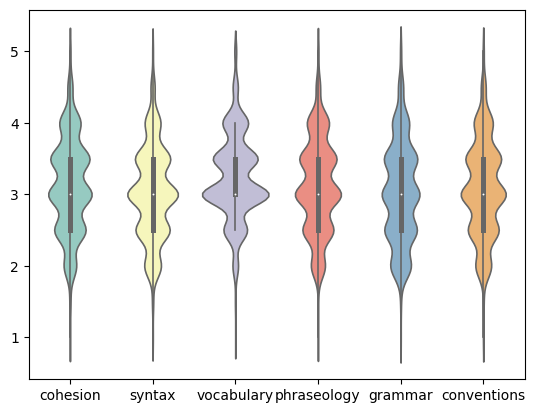

In [10]:
# create violin chart
sns.violinplot(data=train, palette="Set3", bw=.25,  linewidth=1.2)

In [12]:
lang_cat = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
train[lang_cat].apply(pd.value_counts)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1.0,10,11,2,10,8,15
1.5,27,29,14,11,20,20
2.0,315,410,124,350,544,402
2.5,790,839,528,772,855,784
3.0,1096,1250,1503,1153,994,1151
3.5,988,867,1007,929,880,908
4.0,534,388,577,553,447,484
4.5,125,100,115,108,134,122
5.0,26,17,41,25,29,25


In [23]:
corr = train.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr.style.background_gradient(cmap='Pastel2').set_precision(2)

/var/folders/60/gmbxqch57r53py2v67gwvz780000gn/T/ipykernel_4606/906598044.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='Pastel2').set_precision(2)


,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.00,0.70,0.67,0.69,0.64,0.67
syntax,0.70,1.00,0.68,0.73,0.71,0.70
vocabulary,0.67,0.68,1.00,0.74,0.65,0.66
phraseology,0.69,0.73,0.74,1.00,0.72,0.67
grammar,0.64,0.71,0.65,0.72,1.00,0.67
conventions,0.67,0.70,0.66,0.67,0.67,1.00


<BarContainer object of 10 artists>

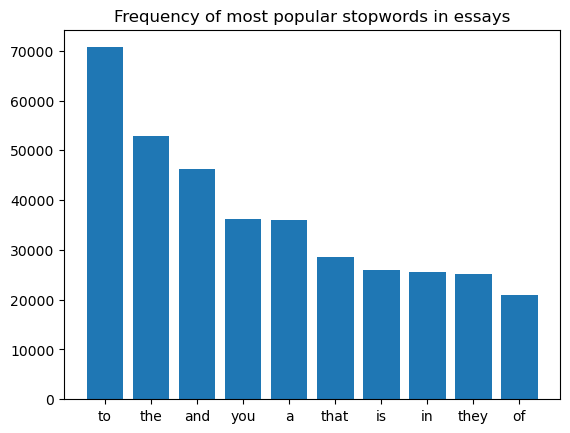

In [36]:
stopwords = stopwords.words('english')
corpus = []

full_text = train['full_text'].str.split()
full_text = full_text.values.tolist()

corpus = [word for i in full_text for word in i]

dict_ = defaultdict(int)
for word in corpus: 
    if word in stopwords:
        dict_[word] += 1

top = sorted(dict_.items(), key=lambda x: x[1], reverse = True)[:10]
x, y = list(zip(*top))
plt.title('Frequency of most popular stopwords in essays')
plt.bar(x,y)

<AxesSubplot:>

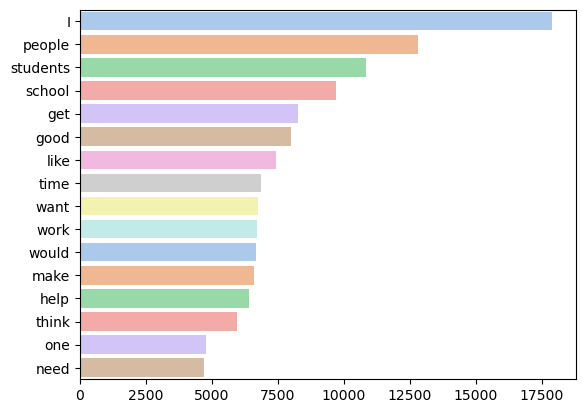

In [39]:
from typing import Counter


counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:60]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x = y, y = x, palette="pastel")